In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from statsmodels.multivariate.pca import PCA as smPCA

sns.set_style("darkgrid")
import os
from pca import PCA

In [2]:
path = os.path.join(os.path.dirname(os.getcwd()), "Data")
returns = pd.read_excel(os.path.join(path, "Data.xlsx"), sheet_name="RETURNS").rename(
    columns={"Unnamed: 0": "Date"}
)
returns = returns.set_index("Date")
returns.head()

,EUROSTOXX50,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.032523,0.054383,0.003162,0.075629,0.041231,0.010972,0.036812,0.097633,0.002335,-0.026051,...,0.076236,0.019595,0.061884,0.100177,0.055098,0.141340,-0.011803,0.070689,-0.025699,0.091075
2006-02-28,0.022783,0.000543,0.077163,-0.046946,-0.021275,-0.046203,0.020732,-0.061456,-0.024685,-0.016879,...,-0.017479,-0.053677,0.042739,0.015130,0.025850,-0.002907,0.030260,-0.071304,-0.012797,0.219389
2006-03-31,0.021922,-0.002326,-0.051172,-0.005057,0.037439,0.130364,0.017577,-0.032165,0.022768,-0.021617,...,-0.020598,0.099439,-0.016324,0.046520,0.000520,0.039068,0.000768,0.031755,0.113553,0.047422
2006-04-28,-0.001103,0.045571,0.009242,0.025480,-0.001745,-0.100372,-0.036871,-0.002967,0.050386,0.107398,...,-0.027246,-0.047770,0.019916,-0.032454,-0.026485,0.007295,-0.019305,0.006891,0.021172,-0.028490
2006-05-31,-0.042522,-0.061532,-0.025948,-0.067838,-0.032199,-0.092904,-0.071193,-0.060119,-0.038437,-0.017612,...,-0.137736,-0.016054,-0.072645,-0.045965,-0.105059,-0.075689,0.025819,-0.048478,0.002404,-0.081681


In [3]:
returns.describe()

,EUROSTOXX50,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.004719,0.009235,0.009438,0.011469,0.010269,0.012790,0.009630,0.022416,0.008509,0.005336,...,0.014702,0.005677,0.004669,0.009625,0.009900,0.012340,0.001822,0.007152,0.007125,0.015072
std,0.050765,0.077033,0.056254,0.081256,0.048141,0.097264,0.075614,0.084336,0.077142,0.077143,...,0.084905,0.055697,0.094139,0.067043,0.074604,0.069379,0.068537,0.061974,0.060066,0.110054
min,-0.162104,-0.344929,-0.160601,-0.269759,-0.134537,-0.451064,-0.397383,-0.230652,-0.227555,-0.242912,...,-0.354230,-0.177535,-0.333333,-0.310862,-0.293385,-0.224832,-0.221362,-0.142883,-0.167168,-0.449053
25%,-0.026895,-0.033515,-0.026484,-0.037737,-0.018405,-0.039596,-0.037497,-0.032616,-0.033279,-0.040933,...,-0.032477,-0.028364,-0.045075,-0.027954,-0.033332,-0.031554,-0.037932,-0.034402,-0.024462,-0.044302
50%,0.008448,0.011636,0.006234,0.004717,0.012138,0.014049,0.014540,0.018435,0.002692,0.008405,...,0.019366,0.007337,0.006434,0.008691,0.011766,0.016421,0.002278,0.007288,0.009075,0.013949
75%,0.038988,0.052773,0.048208,0.066161,0.037717,0.067244,0.056948,0.081537,0.056746,0.059824,...,0.060392,0.042959,0.054954,0.047408,0.055410,0.056590,0.042012,0.039040,0.045239,0.079135
max,0.180858,0.286258,0.164499,0.235201,0.139238,0.401661,0.308488,0.358156,0.302945,0.205594,...,0.351083,0.127686,0.474521,0.240377,0.232395,0.191674,0.303277,0.387490,0.160553,0.379032


In [4]:
stocks = returns.columns.tolist()
model = PCA(returns, stocks)
ic_values = model.full_model.ic.iloc[0:20, 0]
ic_values
model.full_model.ic

,IC_p1,IC_p2,IC_p3
ncomp,,,
0,9.225426,9.225426,9.225426
1,8.749818,8.754918,8.737094
2,8.734623,8.744823,8.709174
3,8.735020,8.750321,8.696847
4,8.753773,8.774174,8.702875
5,8.780304,8.805805,8.716681
6,8.810342,8.840944,8.733995
7,8.840241,8.875943,8.751170
8,8.872158,8.912961,8.770363


In [5]:
model.pc_scores 

,PC1,PC2,PC3
Date,,,
2006-01-31,0.035134,-0.046713,-0.041907
2006-02-28,0.013686,0.013244,0.011790
2006-03-31,0.019754,-0.009707,0.025273
2006-04-28,-0.011972,-0.005724,-0.006252
2006-05-31,-0.057205,0.046858,-0.007450
...,...,...,...
2023-08-31,-0.023104,0.047154,0.000981
2023-09-29,-0.032462,0.088929,-0.001759
2023-10-31,-0.036029,0.045095,0.023861


In [6]:
#Count negative values in the first PC scores 
negatives = 0
for i in model.pc_scores.iloc[:,0]: 
    if i < 0:
        negatives += 1
negatives
model.pc_scores.iloc[:,0].describe() 


count    2.160000e+02
mean     1.413478e-18
std      5.076491e-02
min     -1.924989e-01
25%     -2.948973e-02
50%      3.008497e-03
75%      3.295041e-02
max      2.153294e-01
Name: PC1, dtype: float64

In [7]:
ic_values

ncomp
0     9.225426
1     8.749818
2     8.734623
3     8.735020
4     8.753773
5     8.780304
6     8.810342
7     8.840241
8     8.872158
9     8.904437
10    8.934932
11    8.964409
12    8.990357
13    9.019533
14    9.047776
15    9.075435
16    9.100770
17    9.124308
18    9.145551
19    9.165234
Name: IC_p1, dtype: float64

In [8]:
model.alpha_core_ptf()

/Users/romaincastellarnau/Documents/Financial-Econometrics-II/Code/pca.py:307: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.alpha_core = model.params[0]
/Users/romaincastellarnau/Documents/Financial-Econometrics-II/Code/pca.py:308: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.beta_core = model.params[1]


IndexError: index 1 is out of bounds for axis 0 with size 1

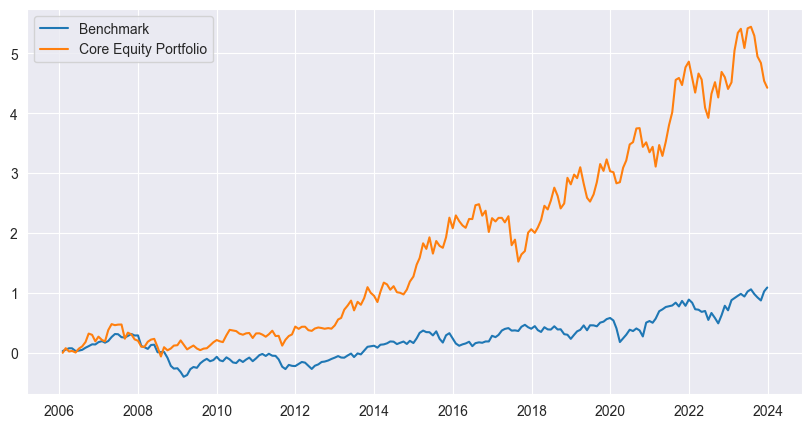

In [ ]:
bench_return = model.total_return_benchmark
core_eq_ptf_return = model.total_return_core_ptf
plt.figure(figsize=(10, 5))
plt.plot(bench_return, label="Benchmark")
plt.plot(core_eq_ptf_return, label="Core Equity Portfolio")
plt.legend()
plt.show()

In [ ]:
comparative_perf = model.comparative_perf
comparative_perf

1.5261397875385891

In [ ]:
model.core_eq_1_exp.shape
model.core_equity_ptf["weights"].T @ model.core_eq_1_exp 


-0.3875906509121683

<Axes: xlabel='Date'>

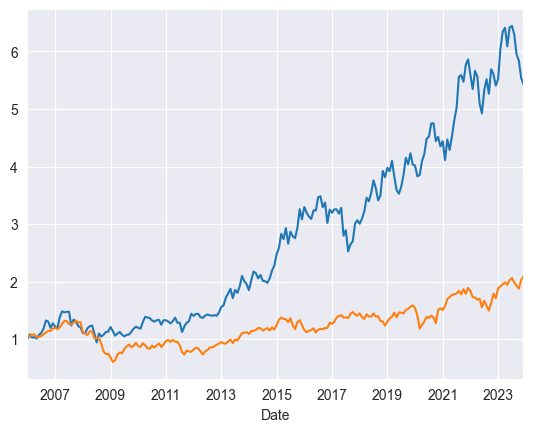

In [ ]:
(1 + returns["KONINKLIJKE AHOLD DELHAIZE N"]).cumprod().plot()
(1 + returns["EUROSTOXX50"]).cumprod().plot()

In [ ]:
model2 = smPCA(returns, standardize=False)
scores = model2.scores.iloc[:, 0]
model2.eigenvecs.iloc[:, 0] = model2.eigenvecs.iloc[:, 0] * -1

back_transformed_pc1 = np.matrix(scores).T @ np.matrix(model2.eigenvecs.iloc[:, 0])
back_transformed_pc1.shape

(216, 48)

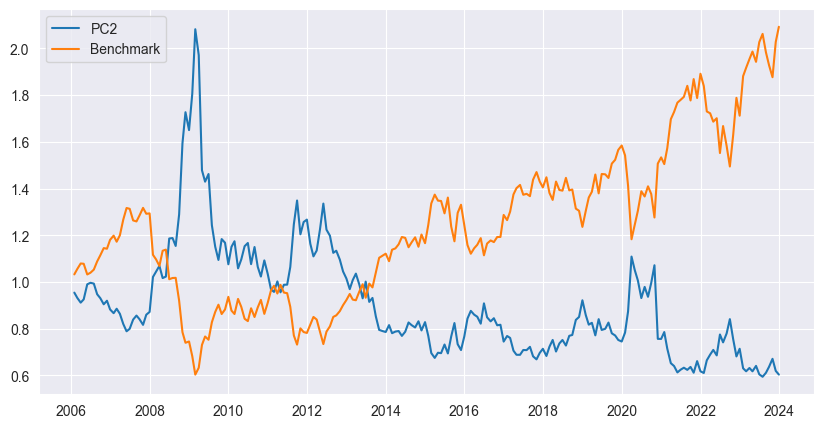

In [ ]:
from sklearn.preprocessing import StandardScaler


# pc_1 = pd.DataFrame(sc.fit_transform(model2.scores.iloc[: , 0].values.reshape(-1, 1))*-1 , index = returns.index)
pc_1 = pd.DataFrame(model2.scores.iloc[:, 0].values.reshape(-1, 1), index=returns.index)
total_return_pc1 = np.cumprod(1 + pc_1)
total_return_bench = np.cumprod(1 + (returns["EUROSTOXX50"]))

plt.figure(figsize=(10, 5))
plt.plot(total_return_pc1, label="PC2")
plt.plot(total_return_bench, label="Benchmark")
plt.legend()
plt.show()

In [ ]:
ptf_vol = model.core_ptf_vol
ptf_vol

0.05612372841718042

In [ ]:
pc_scores = model.pc_scores
pc_scores["PC1"].std()

0.06819943394704732

In [ ]:
returns.describe()

,EUROSTOXX50,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.004719,0.009235,0.009438,0.011469,0.010269,0.012790,0.009630,0.022416,0.008509,0.005336,...,0.014702,0.005677,0.004669,0.009625,0.009900,0.012340,0.001822,0.007152,0.007125,0.015072
std,0.050765,0.077033,0.056254,0.081256,0.048141,0.097264,0.075614,0.084336,0.077142,0.077143,...,0.084905,0.055697,0.094139,0.067043,0.074604,0.069379,0.068537,0.061974,0.060066,0.110054
min,-0.162104,-0.344929,-0.160601,-0.269759,-0.134537,-0.451064,-0.397383,-0.230652,-0.227555,-0.242912,...,-0.354230,-0.177535,-0.333333,-0.310862,-0.293385,-0.224832,-0.221362,-0.142883,-0.167168,-0.449053
25%,-0.026895,-0.033515,-0.026484,-0.037737,-0.018405,-0.039596,-0.037497,-0.032616,-0.033279,-0.040933,...,-0.032477,-0.028364,-0.045075,-0.027954,-0.033332,-0.031554,-0.037932,-0.034402,-0.024462,-0.044302
50%,0.008448,0.011636,0.006234,0.004717,0.012138,0.014049,0.014540,0.018435,0.002692,0.008405,...,0.019366,0.007337,0.006434,0.008691,0.011766,0.016421,0.002278,0.007288,0.009075,0.013949
75%,0.038988,0.052773,0.048208,0.066161,0.037717,0.067244,0.056948,0.081537,0.056746,0.059824,...,0.060392,0.042959,0.054954,0.047408,0.055410,0.056590,0.042012,0.039040,0.045239,0.079135
max,0.180858,0.286258,0.164499,0.235201,0.139238,0.401661,0.308488,0.358156,0.302945,0.205594,...,0.351083,0.127686,0.474521,0.240377,0.232395,0.191674,0.303277,0.387490,0.160553,0.379032


In [ ]:
# Count of many negative values in the first eigenvector
model.eigenvectors

AttributeError: 'PCA' object has no attribute 'eigenvectors'

In [ ]:
# Function that checks the sign of the loadings of the first PC. If F1 the loading vector of the first PC
# contains more than 50% of negative values, the sign of the first loading is flipped.

pc_1_loading = model.pc_loadings["PC1"]

if pc_1_loading[pc_1_loading < 0].count() > pc_1_loading[pc_1_loading > 0].count():
    pc_1_loading = pc_1_loading * -1

pc_1_loading

ANHEUSER-BUSCH INBEV SA/NV      0.119566
KONINKLIJKE AHOLD DELHAIZE N    0.077389
ADIDAS AG                       0.122744
AIR LIQUIDE SA                  0.148624
AIRBUS SE                       0.144585
ALLIANZ SE-REG                  0.184044
ASML HOLDING NV                 0.127349
BASF SE                         0.178054
BAYER AG-REG                    0.137602
BANCO BILBAO VIZCAYA ARGENTA    0.172912
BAYERISCHE MOTOREN WERKE AG     0.161929
DANONE                          0.123768
BNP PARIBAS                     0.169315
CRH PLC                         0.125300
AXA SA                          0.180489
DEUTSCHE BOERSE AG              0.123987
VINCI SA                        0.175582
DHL GROUP                       0.154969
DEUTSCHE TELEKOM AG-REG         0.117049
ESSILORLUXOTTICA                0.123455
ENEL SPA                        0.152883
ENGIE                           0.135900
ENI SPA                         0.151456
FRESENIUS SE & CO KGAA          0.120225
SOCIETE GENERALE

In [ ]:
if 

In [ ]:
# Kaiser criterion
eigen_values = model.eigenvalues
variance_explained = model.variance_explained

<Axes: >

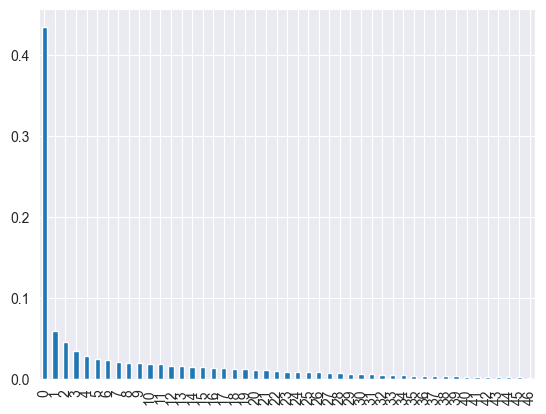

In [ ]:
variance_explained.plot.bar()

In [ ]:
pc_scores = model.pc_scores
pc_scores["PC1"].describe()
pc_scores["PC1"].std() - returns["EUROSTOXX50"].std()

0.017434523018396972

In [ ]:
bench = model.benchmark_vol
rescaled_pc = pc_scores * bench / pc_scores.std()
rescaled_pc.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
count,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,...,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02,2.160000e+02
mean,-1.413478e-18,5.139921e-19,1.798972e-18,5.139921e-19,-2.055969e-18,-5.139921e-19,9.637353e-19,6.424902e-19,5.139921e-19,-5.139921e-19,...,-1.541976e-18,-2.055969e-18,1.284980e-18,2.377214e-18,1.027984e-18,-1.284980e-19,5.139921e-19,-1.027984e-18,-2.055969e-18,-6.167906e-18
std,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,...,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02,5.076491e-02
min,-2.153294e-01,-1.426825e-01,-1.717021e-01,-2.031607e-01,-1.445338e-01,-2.190930e-01,-1.976981e-01,-2.043661e-01,-2.056570e-01,-1.405602e-01,...,-2.259892e-01,-1.500523e-01,-1.630185e-01,-1.495365e-01,-2.011061e-01,-1.335858e-01,-1.641530e-01,-1.397553e-01,-1.613063e-01,-1.760354e-01
25%,-3.295041e-02,-2.782356e-02,-3.122824e-02,-2.803487e-02,-2.861675e-02,-3.041638e-02,-2.702291e-02,-3.190959e-02,-2.710261e-02,-3.319476e-02,...,-2.925337e-02,-2.788521e-02,-3.109706e-02,-3.920352e-02,-3.073767e-02,-3.418953e-02,-3.401367e-02,-3.237753e-02,-3.353406e-02,-3.124008e-02
50%,-3.008497e-03,-4.413220e-03,-2.301308e-03,-4.304690e-04,-3.862272e-04,-4.351865e-03,-1.976614e-03,5.825609e-04,5.964394e-04,7.056222e-04,...,-1.262193e-03,1.021936e-03,8.809663e-04,1.859046e-03,1.880117e-03,-2.829693e-03,-1.033227e-03,4.326527e-04,-5.649100e-03,-3.185547e-03
75%,2.948973e-02,3.229714e-02,3.325475e-02,2.824400e-02,2.867514e-02,2.941113e-02,2.498786e-02,3.154554e-02,3.012905e-02,3.405160e-02,...,3.196569e-02,3.606389e-02,3.317717e-02,3.727879e-02,3.366769e-02,3.404163e-02,3.071960e-02,3.521710e-02,3.443378e-02,3.267452e-02
max,1.924989e-01,1.619428e-01,1.398146e-01,1.942773e-01,1.409201e-01,1.995597e-01,2.080549e-01,1.637992e-01,1.863699e-01,1.558391e-01,...,1.580626e-01,1.594601e-01,1.636435e-01,1.128542e-01,1.226507e-01,1.560165e-01,1.531025e-01,1.134662e-01,1.703761e-01,1.571899e-01


In [ ]:
for i in stocks:
    print(returns[i].head())


print(returns.columns.tolist())

Date
2006-01-31    0.032523
2006-02-28    0.022783
2006-03-31    0.021922
2006-04-28   -0.001103
2006-05-31   -0.042522
Name: EUROSTOXX50, dtype: float64
Date
2006-01-31    0.054383
2006-02-28    0.000543
2006-03-31   -0.002326
2006-04-28    0.045571
2006-05-31   -0.061532
Name: ANHEUSER-BUSCH INBEV SA/NV, dtype: float64
Date
2006-01-31    0.003162
2006-02-28    0.077163
2006-03-31   -0.051172
2006-04-28    0.009242
2006-05-31   -0.025948
Name: KONINKLIJKE AHOLD DELHAIZE N, dtype: float64
Date
2006-01-31    0.075629
2006-02-28   -0.046946
2006-03-31   -0.005057
2006-04-28    0.025480
2006-05-31   -0.067838
Name: ADIDAS AG, dtype: float64
Date
2006-01-31    0.041231
2006-02-28   -0.021275
2006-03-31    0.037439
2006-04-28   -0.001745
2006-05-31   -0.032199
Name: AIR LIQUIDE SA, dtype: float64
Date
2006-01-31    0.010972
2006-02-28   -0.046203
2006-03-31    0.130364
2006-04-28   -0.100372
2006-05-31   -0.092904
Name: AIRBUS SE, dtype: float64
Date
2006-01-31    0.036812
2006-02-28    0.0

In [ ]:
scores = model.reduced_pc_scores  # PC1
scores

AttributeError: 'PCA' object has no attribute 'reduced_pc_scores'

In [ ]:
returns = model.returns
returns

,EUROSTOXX50,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.548973,0.587450,-0.111836,0.791435,0.644653,-0.018728,0.360331,0.893937,-0.080220,-0.407811,...,0.726423,0.250474,0.609178,1.353787,0.607245,1.863681,-0.199258,1.027593,-0.547727,0.692194
2006-02-28,0.356658,-0.113101,1.206704,-0.720566,-0.656768,-0.607933,0.147177,-0.996802,-0.431292,-0.288642,...,-0.379906,-1.068131,0.405336,0.082305,0.214294,-0.220279,0.415890,-1.268902,-0.332444,1.860823
2006-03-31,0.339669,-0.150425,-1.079948,-0.203849,0.565685,1.211619,0.105345,-0.648694,0.185272,-0.350194,...,-0.416729,1.687347,-0.223524,0.551600,-0.126023,0.386145,-0.015415,0.397898,1.775963,0.294621
2006-04-28,-0.114943,0.472788,-0.003508,0.172837,-0.250144,-1.166146,-0.616400,-0.301681,0.544118,1.326093,...,-0.495210,-0.961823,0.162330,-0.629100,-0.488848,-0.072889,-0.308970,-0.004235,0.234408,-0.396745
2006-05-31,-0.932751,-0.920792,-0.630504,-0.978275,-0.884207,-1.089186,-1.071373,-0.980918,-0.609978,-0.298167,...,-1.799564,-0.391060,-0.823193,-0.831097,-1.544507,-1.271754,0.350956,-0.899731,-0.078787,-0.881183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,-0.850411,-0.007731,-0.582097,-0.113297,0.232279,-0.024117,0.296129,-1.048756,-0.638118,-0.705103,...,-0.381578,0.185143,-0.285229,0.387304,-1.528709,-0.486761,-0.226615,0.706741,0.472803,-0.705337
2023-09-29,-0.644429,-0.117661,-1.145421,-1.332046,-1.089742,-0.771209,-0.047903,-1.220477,-1.176828,-1.377835,...,-0.146493,0.415980,-0.000962,-0.840257,-0.444540,-0.324036,0.141630,1.271389,-0.345110,-0.467604
2023-10-31,-0.616192,0.157363,-0.493027,-0.098533,0.025865,-0.188607,-0.409549,-0.134629,0.066380,-1.438721,...,-0.302225,-2.900505,-0.260144,0.333266,-1.192680,-1.282652,-0.865967,0.115331,0.202966,-0.898901


In [ ]:
pca_models = model.pca_model()
first_stock = list(pca_models.keys())[0]
result_1 = pca_models[first_stock]["model_result"]
alpha_1 = pca_models[first_stock]["alpha"]
beta_1 = pca_models[first_stock]["beta"]
residuals_1 = pca_models[first_stock]["residuals"]
print(result_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2084.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          5.43e-157
Time:                        10:44:40   Log-Likelihood:                 62.598
No. Observations:                 216   AIC:                            -117.2
Df Residuals:                     212   BIC:                            -103.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.735e-18      0.012   1.39e-16      1.0